## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

**1. Loading data**

In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
import scipy.stats
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Open 'Data/kc_house_data.csv' using pd.read_csv

In [2]:
data = pd.read_csv('Data/kc_house_data.csv', index_col=0)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


Open the 'Data/column_names.md' using os function

In [3]:
file_path = 'Data/column_names.md'

if os.path.isfile(file_path) and file_path.endswith('.md'):
    with open(file_path, 'r') as file:
        contents = file.read()
        print(contents)


# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

**2. DATA PREPARATION**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 1

In [5]:
data.shape

(21597, 20)

In [6]:
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [7]:
data['waterfront'].isna().sum()

2376

Determining the number of houses renovated by looking at the 'yr_renovated' column in the dataset

In [8]:
data['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

Dropping missing values

In [9]:
data.dropna(subset = 'yr_renovated', inplace = True)

In [10]:
#Dropping waterfront rows with missing values
data.dropna(subset = 'waterfront', inplace = True)

In [11]:
#Dropping view rows with missing values
data.dropna(subset = 'view', inplace = True)

In [12]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15762 entries, 6414100192 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15762 non-null  object 
 1   price          15762 non-null  float64
 2   bedrooms       15762 non-null  int64  
 3   bathrooms      15762 non-null  float64
 4   sqft_living    15762 non-null  int64  
 5   sqft_lot       15762 non-null  int64  
 6   floors         15762 non-null  float64
 7   waterfront     15762 non-null  object 
 8   view           15762 non-null  object 
 9   condition      15762 non-null  object 
 10  grade          15762 non-null  object 
 11  sqft_above     15762 non-null  int64  
 12  sqft_basement  15762 non-null  object 
 13  yr_built       15762 non-null  int64  
 14  yr_renovated   15762 non-null  float64
 15  zipcode        15762 non-null  int64  
 16  lat            15762 non-null  float64
 17  long           15762 non-null  float64
 1

Checking for duplicates

In [14]:
data.duplicated().sum()

0

Checking the rates of each house based on 'grade' column in the dataset

In [15]:
data['grade'].value_counts()

grade
7 Average        6539
8 Good           4438
9 Better         1920
6 Low Average    1482
10 Very Good      832
11 Excellent      290
5 Fair            167
12 Luxury          66
4 Low              16
13 Mansion         11
3 Poor              1
Name: count, dtype: int64

**Selecting the required features and placing it under data**

In [16]:
data_needed = data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','view','date','yr_renovated']]
data_needed.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,view,date,yr_renovated
id,,,,,,,,,,,,
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,NONE,12/9/2014,1991.0
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,NONE,12/9/2014,0.0
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,NONE,2/18/2015,0.0
7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,NONE,5/12/2014,0.0
1321400060,257500.0,3,2.25,1715,6819,2.0,NO,Average,7 Average,NONE,6/27/2014,0.0
2414600126,229500.0,3,1.00,1780,7470,1.0,NO,Average,7 Average,NONE,4/15/2015,0.0
3793500160,323000.0,3,2.50,1890,6560,2.0,NO,Average,7 Average,NONE,3/12/2015,0.0
9212900260,468000.0,2,1.00,1160,6000,1.0,NO,Good,7 Average,NONE,5/27/2014,0.0
6054650070,400000.0,3,1.75,1370,9680,1.0,NO,Good,7 Average,NONE,10/7/2014,0.0


In [17]:
data_needed['waterfront'].value_counts()

waterfront
NO     15642
YES      120
Name: count, dtype: int64

In [18]:
data_needed['floors'].value_counts()

floors
1.0    7777
2.0    6049
1.5    1374
3.0     439
2.5     117
3.5       6
Name: count, dtype: int64

In [19]:
data_needed['bedrooms'].value_counts()

bedrooms
3     7120
4     5079
2     2003
5     1183
6      192
1      141
7       23
8       10
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [20]:
data_needed['bathrooms'].value_counts()

bathrooms
2.50    4004
1.00    2761
1.75    2226
2.25    1487
2.00    1395
1.50    1060
2.75     853
3.50     543
3.00     543
3.25     428
3.75     104
4.00     100
4.50      75
4.25      62
0.75      50
4.75      17
5.00      14
5.25      11
5.50       8
1.25       6
6.00       5
0.50       3
5.75       2
8.00       2
6.75       1
7.50       1
7.75       1
Name: count, dtype: int64

In [21]:
data_needed.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_renovated
count,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000
mean,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,82.440236
std,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,397.212626
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000
25%,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000
75%,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


Looking at correlation between 'price' and other variables:

In [79]:
data_needed[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_renovated']].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_renovated
price,1.000000,0.305489,0.526155,0.706189,0.084504,0.259505,0.122731
bedrooms,0.305489,1.000000,0.512243,0.573575,0.025460,0.180485,0.017430
bathrooms,0.526155,0.512243,1.000000,0.753846,0.080362,0.505187,0.046988
sqft_living,0.706189,0.573575,0.753846,1.000000,0.165336,0.359407,0.050232
sqft_lot,0.084504,0.025460,0.080362,0.165336,1.000000,-0.009924,0.002147
floors,0.259505,0.180485,0.505187,0.359407,-0.009924,1.000000,-0.000720
yr_renovated,0.122731,0.017430,0.046988,0.050232,0.002147,-0.000720,1.000000


**3.FORMULATING HYPOTHESIS**

Null hypothesis: Home renovations does not increase the estimated value of houses.\
Alternative hypothesis: Home renovations does increase the estimated value of houses.

**4.HYPOTHESIS TESTING**

**Baseline model**

Baseline model using 'sqftliving' attribute to predict the 'price' attribute

In [27]:
dummy_data_needed = data_needed.copy()
dummy_data_needed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,view,date,yr_renovated
id,,,,,,,,,,,,
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,NONE,12/9/2014,1991.0
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,NONE,12/9/2014,0.0
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,NONE,2/18/2015,0.0
7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,NONE,5/12/2014,0.0
1321400060,257500.0,3,2.25,1715,6819,2.0,NO,Average,7 Average,NONE,6/27/2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2997800021,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,NONE,2/19/2015,0.0
263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,NONE,5/21/2014,0.0
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,NONE,2/23/2015,0.0


Sqft_living feature having the highest correlation of 0.706189. We shall use it to build a baseline model

In [86]:
#determining the y variable and the x variable and 
y_baseline = dummy_data_needed['price']
x_baseline = dummy_data_needed['sqft_living']
baseline_model = sm.OLS(y_baseline, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        03:20:18   Log-Likelihood:            -2.1911e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15760   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.516e+04   5205.744    -10.597      0.000   -6.54e+04    -4.5e+04
sqft_living   286.1494      2.285    125.214      0.000     281.670     290.629
==============================================================================
Omnibus:                    11136.965   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457340.013
Skew:                           2.910   Prob(JB):                         0.00
Kurtosis:                      28.739   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results:
1. The model explains about 50% variance in price.
2. The model's coefficients(const and sqft_living) are both statistically significant with a t-statictic p-values below 0.05
3. For an increase in sqft_living there is an associate increase in price by 286.15.
4. If sqft_living = 0, the price would be expected to be -55,160.00



**Baseline model visualization**

Plotting a graph of the actual vs predicted values

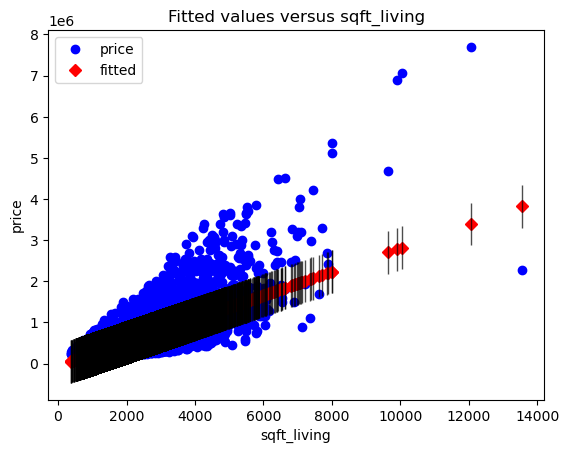

In [87]:
sm.graphics.plot_fit(baseline_results,'sqft_living')
plt.show()

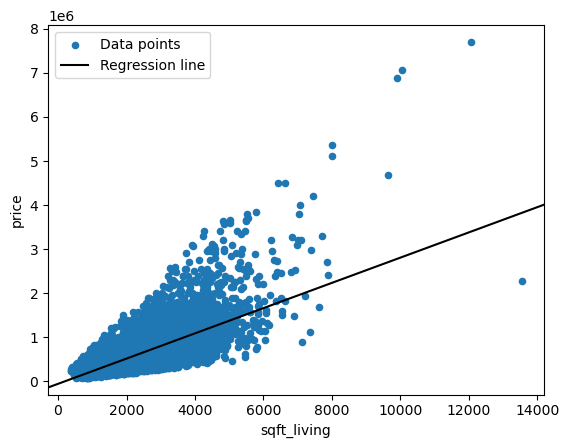

In [88]:
fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y='price', label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

Plotting the residuals

In [89]:
baseline_results.resid

id
6414100192   -142239.154974
2487200875     98311.960983
1954400510     84433.784701
7237550310   -265764.860674
1321400060   -178081.443264
                  ...      
2997800021    155309.051757
263000018     -22643.809736
6600060120   -205840.318665
1523300141    165393.369179
1523300157     88292.369179
Length: 15762, dtype: float64

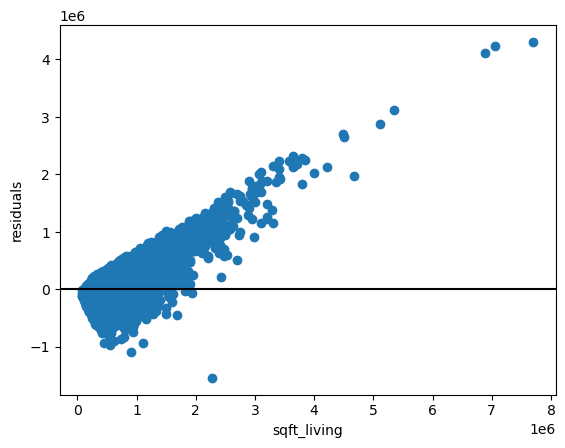

In [90]:
fig, ax = plt.subplots()

ax.scatter(data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

**Second model**

We shall add another predictor variable 

In [91]:
dum2_data_needed = data_needed.copy()

Sqft_living, Bathrooms features have the highest correlations of 0.706189 and 0.526155. 

In [94]:
x = dum2_data_needed[['sqft_living','bathrooms']]
x

,sqft_living,bathrooms
id,,
6414100192,2570,2.25
2487200875,1960,3.00
1954400510,1680,2.00
7237550310,5420,4.50
1321400060,1715,2.25
...,...,...
2997800021,1310,2.50
263000018,1530,2.50
6600060120,2310,2.50


In [95]:
y = dum2_data_needed['price']
x = dum2_data_needed[['sqft_living','bathrooms']]
baseline_model = sm.OLS(y, sm.add_constant(x))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     7842.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        03:23:20   Log-Likelihood:            -2.1910e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15759   BIC:                         4.382e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.952e+04   6201.864     -7.985      0.000   -6.17e+04   -3.74e+04
sqft_living   290.5382      3.478     83.538      0.000     283.721     297.355
bathrooms   -6974.8960   4166.639     -1.674      0.094   -1.51e+04    1192.193
==============================================================================
Omnibus:                    11117.356   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           454684.089
Skew:                           2.904   Prob(JB):                         0.00
Kurtosis:                      28.663   Cond. No.                     7.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results:
1. sThe model is statistically significant overall, with an F-statistic p-value well below 0.05
1. The model explains about 50% variance in price.
2. The model coefficients(const and sqft_living) are both statistically significant with a t-statictic p-values below 0.05
3. Bathrooms have p-values above 0.05. This means that there is greater than a 1 in 20 chance that their true coefficients are    0 (i.e. they have no effect on price), and are thus not statistically significant at an alpha of 0.05
3. For an increase in sqft_living there is an associate increase in price by 286.15.
4. 
5. If sqft_living = 0, the price would be expected to be -55,160.00